In [2]:
!pip install -q transformers datasets evaluate accelerate pipeline bitsandbytes torchdata peft loralib bert_score rouge_score huggingface_hub

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 23.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.8 MB/s eta 0:00:00:00:

In [3]:
import os
import torch
from datasets import load_dataset
from transformers import (
    T5Tokenizer,
    T5ForConditionalGeneration,
    DataCollatorForSeq2Seq,
    Trainer,
    TrainingArguments,
)

2025-05-23 11:49:41.214490: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748000981.441758      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748000981.504681      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
import evaluate
import pandas as pd
import numpy as np
import json
import random
import seaborn as sns

In [5]:
dataset = load_dataset("knkarthick/dialogsum")

README.md:   0%|          | 0.00/4.65k [00:00<?, ?B/s]

train.csv:   0%|          | 0.00/11.3M [00:00<?, ?B/s]

validation.csv:   0%|          | 0.00/442k [00:00<?, ?B/s]

test.csv:   0%|          | 0.00/1.35M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/12460 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/500 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1500 [00:00<?, ? examples/s]

In [6]:
base_small = "t5-small"
base_large = "t5-base"
base_small_tuned = 'majorSeaweed/T5-Conv_summarisation_small'
base_large_tuned = 'majorSeaweed/T5-Conv_summarisation_base'

In [7]:
tokenizer_small = T5Tokenizer.from_pretrained(base_small)
small = T5ForConditionalGeneration.from_pretrained(base_small)

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [8]:
tokenizer_small_tuned = T5Tokenizer.from_pretrained(base_small)
small_tuned = T5ForConditionalGeneration.from_pretrained(base_small_tuned)

config.json:   0%|          | 0.00/1.50k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

In [9]:
tokenizer_large = T5Tokenizer.from_pretrained(base_large)
large = T5ForConditionalGeneration.from_pretrained(base_large)

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [10]:
tokenizer_large_tuned = T5Tokenizer.from_pretrained(base_large_tuned)
large_tuned = T5ForConditionalGeneration.from_pretrained(base_large_tuned)

tokenizer_config.json:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.59k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.50k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
small.to(device)
large.to(device)
small_tuned.to(device)
large_tuned.to(device)
print('Models Loaded to Device')

Models Loaded to Device


In [12]:
def generate_summary(conversation):
    input_text = "dialogue: " + conversation
    inputs = tokenizer.encode(input_text, return_tensors="pt", max_length=max_input_length, truncation=True).to(device)
    summary_ids = model.generate(
        inputs,
        max_length=max_output_length,
        num_beams=4,
        early_stopping=True
    )
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

In [13]:
def get_model_evaluations(summaries):
  llm = [s['T5 Zero Shot'] for s in summaries]
  human = [s['human'] for s in summaries]

  rouge = evaluate.load('rouge')
  r = rouge.compute(
    predictions = llm,
    references = human,
    use_aggregator=False,
    use_stemmer=True,
    rouge_types =  ['rouge1','rouge2','rougeL']
   )

  bert = evaluate.load("bertscore")
  b = bert.compute(
      predictions = llm,
      references = human,
      lang='en'
  )['f1']

  r.update({'bert':b})

  return pd.DataFrame(r)

In [14]:
def get_prompt(dialogue):
    prompt = "Summarize the following conversation:\n\n"
    prompt += f"{dialogue}"
    prompt += "\n\n Summary:"
    return prompt

In [15]:
def generate_summaries(conversation , model , tokenizer):
    input_text = "dialogue: " + conversation
    inputs = tokenizer.encode(input_text, return_tensors="pt", max_length=max_input_length, truncation=True).to(device)
    summary_ids = model.generate(
        inputs.to(device),
        max_length=max_output_length,
        num_beams=4,
        early_stopping=True
    )
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

In [16]:
from tqdm import tqdm
def generate_responses(data, model, tokenizer, indexes):
    summaries=[]
    for idx in tqdm(range(indexes)):
        dialogue = data['dialogue'][idx]
        human_summary = data['summary'][idx]
        prompt = "dialogue: " + dialogue
        llm_summary = generate_summaries(prompt, model, tokenizer)
        summary = {'index':idx,'human':human_summary,'T5 Zero Shot':llm_summary}
        summaries.append(summary)
        
    return summaries

In [24]:
def preprocess_function_small(examples):
    inputs = ["dialogue: " + conversation for conversation in examples["dialogue"]]
    targets = examples["summary"]
    
    model_inputs = tokenizer_small(inputs, max_length=max_input_length, truncation=True)
    with tokenizer_small.as_target_tokenizer():
        labels = tokenizer_small(targets, max_length=max_output_length, truncation=True)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [29]:
def preprocess_function_large(examples):
    inputs = ["dialogue: " + conversation for conversation in examples["dialogue"]]
    targets = examples["summary"]
    
    model_inputs = tokenizer_large(inputs, max_length=max_input_length, truncation=True)
    with tokenizer_large.as_target_tokenizer():
        labels = tokenizer_large(targets, max_length=max_output_length, truncation=True)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [25]:
max_input_length = 512
max_output_length = 150

In [26]:
dataset_test_small = dataset['test'].map(preprocess_function_small, batched=True)
dataset_test_small.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

Map:   0%|          | 0/1500 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:3980: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


In [30]:
dataset_test_large = dataset['test'].map(preprocess_function_large, batched=True)
dataset_test_large.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

Map:   0%|          | 0/1500 [00:00<?, ? examples/s]

In [31]:
summaries_small = generate_responses(dataset_test_small , small , tokenizer_small, 200)

100%|██████████| 200/200 [02:54<00:00,  1.15it/s]


In [32]:
summaries_small_tuned = generate_responses(dataset_test_small , small_tuned , tokenizer_small_tuned, 200)

100%|██████████| 200/200 [01:31<00:00,  2.20it/s]


In [33]:
summaries_large = generate_responses(dataset_test_large , large , tokenizer_large, 200)

100%|██████████| 200/200 [03:15<00:00,  1.02it/s]


In [34]:
summaries_large_tuned = generate_responses(dataset_test_large , large_tuned , tokenizer_large_tuned, 200)

100%|██████████| 200/200 [02:49<00:00,  1.18it/s]


In [35]:
eval_df_untuned_small = get_model_evaluations(summaries_small)
eval_df_untuned_large = get_model_evaluations(summaries_large)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [36]:
eval_df_tuned_small = get_model_evaluations(summaries_small_tuned)
eval_df_tuned_large = get_model_evaluations(summaries_large_tuned)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [38]:
def plot_evaluation_metrics(scores_base, scores_tuned , scores_large_base , scores_large_tuned):
    scores_base['model'] = 'small'
    scores_tuned['model'] = 'tuned_small'
    scores_large_base['model'] = 'base'
    scores_large_tuned['model'] = 'tuned_base'
    
    df = pd.concat([scores_base,scores_tuned,scores_large_base , scores_large_tuned])
    df_long = pd.melt(df, id_vars=['model'],var_name='metric',value_name='score')
    
    plt.figure(figsize=(10,6))
    plot = sns.boxplot(x="metric", y="score",hue="model",data=df_long)
    plot.set(title = "Evaluation Metrics: Base model vs Fine Tuned Model's Comparsison")

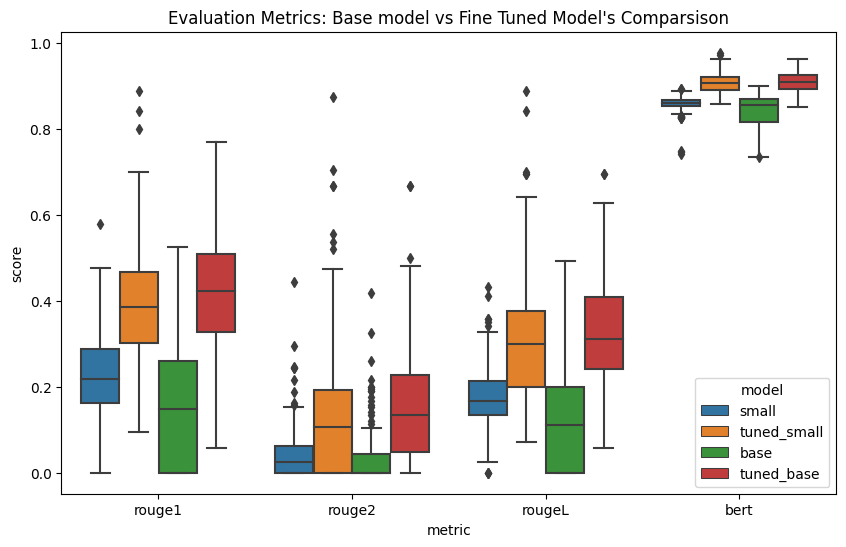

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
plot_evaluation_metrics(eval_df_untuned_small , eval_df_tuned_small, eval_df_untuned_large, eval_df_tuned_large)